# Data Preprocessing

## Import dataset and analyze it

In [8]:
import pandas as pd
import zipfile

zip_path = "../BindingDB_PDSPKi_202504_tsv.zip"
tsv_filename = "../BindingDB_PDSPKi.tsv"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(tsv_filename) as file:
        original_df = pd.read_csv(file, sep='\t', on_bad_lines='skip')

original_df.head()

RecursionError: maximum recursion depth exceeded while calling a Python object

In [2]:
original_df.shape

(27694, 50)

In [3]:
original_df.columns

Index(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name',
       'Target Source Organism According to Curator or DataSource', 'Ki (nM)',
       'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)',
       'pH', 'Temp (C)', 'Curation/DataSource', 'Article DOI',
       'BindingDB Entry DOI', 'PMID', 'PubChem AID', 'Patent Number',
       'Authors', 'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'Ligand HET ID in PDB',
       'PDB ID(s) for Ligand-Target Complex', 'PubChem CID', 'PubChem SID',
       'ChEBI ID of Ligand', 'ChEMBL ID of Ligand', 'DrugBank ID of Ligand',
       'IUPHAR_GRAC ID of Ligand', 'KEGG ID of Ligand', 'ZINC ID of Ligand',
       'Number of Protein Chains in Target (>1 implies a multichain complex)',
       'BindingDB Target Chain Sequence', 'PDB ID(s) of Target

In [4]:
print(len(original_df["Target Name"].unique()))

398


In [5]:
# Find the most frequent value in "Target Name"
top_target = original_df["Target Name"].value_counts().idxmax()
top_count = original_df["Target Name"].value_counts().max()

print(f"Most frequent 'Target Name': {top_target} ({top_count} occurrences)")

Most frequent 'Target Name': D(2) dopamine receptor (1632 occurrences)


## Filter dataset
Only Ligand whose target is dopamine receptor will be considered. Input features are Ligand SMILES and output is Ki (nM)

In [6]:
# Filter the dataset
filtered_df = original_df[original_df["Target Name"] == top_target]
# Remove rows with missing values in the "Ki (nM)" column
filtered_df = filtered_df.dropna(subset=["Ki (nM)"])

# Check the shape and preview the filtered dataset
print(f"Filtered dataset has {filtered_df.shape[0]} rows.")
filtered_df.head()

Filtered dataset has 1632 rows.


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
472,154285,CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)[C@@...,InChI=1S/C32H40BrN5O5/c1-16(2)12-24-29(40)37-1...,OZVBMTJYIDMWIL-AYFBDAFISA-N,81993,BROMOCRIPTINE::Bromocriptine+ (GTP+)::Bromocri...,D(2) dopamine receptor,Bos taurus,2.5,NaN,...,D(2) dopamine receptor,DRD2_BOVIN,P20288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,154286,NC1CCc2cc(O)c(O)cc2C1,InChI=1S/C10H13NO2/c11-8-2-1-6-4-9(12)10(13)5-...,ASXGAOFCKGHGMF-UHFFFAOYSA-N,81195,"(+/-)-2-Amino-6,7-dihydroxy-1,2,3,4-tetrahydro...",D(2) dopamine receptor,Bos taurus,120,NaN,...,D(2) dopamine receptor,DRD2_BOVIN,P20288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,154287,CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)C4Cc...,InChI=1S/C32H41N5O5/c1-17(2)12-25-29(39)36-11-...,YDOTUXAWKBPQJW-ISVRSENOSA-N,50855,ALPHA-ERGOCRYPTINE::MLS000069839::SMR000058703...,D(2) dopamine receptor,Bos taurus,1.3,NaN,...,D(2) dopamine receptor,DRD2_BOVIN,P20288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,154288,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,InChI=1S/C17H17NO2/c1-18-8-7-10-3-2-4-12-15(10...,VMWNQDUVQKEIOC-CYBMUJFWSA-N,50001955,"(-)6-Methyl-5,6,6a,7-tetrahydro-4H-dibenzo[de,...",D(2) dopamine receptor,Bos taurus,51,NaN,...,D(2) dopamine receptor,DRD2_BOVIN,P20288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,154289,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,InChI=1S/C17H17NO2/c1-18-8-7-10-3-2-4-12-15(10...,VMWNQDUVQKEIOC-CYBMUJFWSA-N,50001955,"(-)6-Methyl-5,6,6a,7-tetrahydro-4H-dibenzo[de,...",D(2) dopamine receptor,Bos taurus,43,NaN,...,D(2) dopamine receptor,DRD2_BOVIN,P20288,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Final dataset: keep only rows with non-null Ki values
final_df = filtered_df[["Ligand SMILES", "Ki (nM)"]].dropna()

# Check the result
final_df.head()

,Ligand SMILES,Ki (nM)
472,CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)[C@@...,2.5
473,NC1CCc2cc(O)c(O)cc2C1,120
474,CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)C4Cc...,1.3
475,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,51
476,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,43


## Output features (Ki (nM)) processing

In [8]:
import numpy as np

# Convert to numeric, coerce errors to NaN
final_df["Ki (nM)_converted"] = pd.to_numeric(final_df["Ki (nM)"], errors='coerce')

# Filter out non-positive or NaN values
final_df_Ki_filtered = final_df[final_df["Ki (nM)_converted"].notna() & (final_df["Ki (nM)_converted"] > 0)]

# Add log-transformed Ki, since biochemical values span several orders of magnitude 
# and the log scale is often more informative:
final_df_Ki_filtered["log_Ki"] = np.log10(final_df_Ki_filtered["Ki (nM)_converted"])

df_wlogKi = final_df_Ki_filtered

# Check the result
print(df_wlogKi.shape)
df_wlogKi.head()

(1439, 4)


C:\Users\alice\AppData\Local\Temp\ipykernel_37184\3735405964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_Ki_filtered["log_Ki"] = np.log10(final_df_Ki_filtered["Ki (nM)_converted"])


,Ligand SMILES,Ki (nM),Ki (nM)_converted,log_Ki
472,CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)[C@@...,2.5,2.5,0.397940
473,NC1CCc2cc(O)c(O)cc2C1,120,120.0,2.079181
474,CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)C4Cc...,1.3,1.3,0.113943
475,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,51,51.0,1.707570
476,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,43,43.0,1.633468


In [9]:
# Identify unselected (invalid) values
invalid_ki = final_df[(final_df["Ki (nM)_converted"].isna()) | (final_df["Ki (nM)_converted"] <= 0)]["Ki (nM)"]

# Visualize those values
print("Values that were not selected:")
print(invalid_ki.unique())

Values that were not selected:
['>10000']


Ki values that are '>10000' are not precise so they were not selected.

## Conversion to numpy + Input features (SMILES) processing

In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
import numpy as np
from tqdm import tqdm

tqdm.pandas()

# Convert SMILES to Mol objects
mols = df_wlogKi["Ligand SMILES"].progress_apply(Chem.MolFromSmiles)

# Filter out invalid mols
valid_idx = mols.notnull()
mols = mols[valid_idx].reset_index(drop=True)
log_Ki = df_wlogKi.loc[valid_idx, "log_Ki"].reset_index(drop=True)

# Descriptor extraction to NumPy
def compute_descriptors_np(mol):
    return np.array([
        Descriptors.MolWt(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.RingCount(mol)
    ])

descriptor_list = [compute_descriptors_np(mol) for mol in tqdm(mols)]
X_desc = np.vstack(descriptor_list)         # shape: (n_samples, 6)
y = log_Ki.to_numpy().reshape(-1, 1)         # shape: (n_samples, 1)

# Optional: Morgan fingerprints
def compute_fingerprint_np(mol, radius=2, nBits=2048):
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))

fingerprint_list = [compute_fingerprint_np(mol) for mol in tqdm(mols)]
X_fps = np.vstack(fingerprint_list)         # shape: (n_samples, 2048)

# Combine descriptors + fingerprints (optional)
X_all = np.hstack([X_desc, X_fps])          # shape: (n_samples, 2054)

100%|██████████| 1439/1439 [00:03<00:00, 436.28it/s]


In [11]:
# Visualization
print(X_all.shape)
print(X_all)

print(X_desc)

(1439, 2054)
[[654.606   3.      6.    ...   0.      0.      0.   ]
 [179.219   3.      3.    ...   0.      0.      0.   ]
 [575.71    3.      6.    ...   0.      0.      0.   ]
 ...
 [501.071   2.      5.    ...   0.      0.      0.   ]
 [501.071   2.      5.    ...   0.      0.      0.   ]
 [369.487   2.      6.    ...   0.      0.      0.   ]]
[[654.606   3.      6.    118.21    5.      7.   ]
 [179.219   3.      3.     66.48    0.      2.   ]
 [575.71    3.      6.    118.21    5.      7.   ]
 ...
 [501.071   2.      5.     66.07    7.      4.   ]
 [501.071   2.      5.     66.07    7.      4.   ]
 [369.487   2.      6.    101.73    7.      2.   ]]


Using X_all, which contains 2054 features and 1439 samples, is risky because it could lead to overfitting. First, only X_desc (1439, 6) will be used.

In [12]:
# Normalize X_desc
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_desc_scaled = scaler.fit_transform(X_desc)
print(X_desc_scaled)

[[ 3.6722227   1.74634788  1.46544034  2.1946403   0.41987974  3.12802546]
 [-2.17683836  1.74634788 -0.53592187  0.6136377  -1.65929074 -1.40584706]
 [ 2.70150301  1.74634788  1.46544034  2.1946403   0.41987974  3.12802546]
 ...
 [ 1.78316054  0.77307344  0.79831961  0.60110703  1.25154793  0.40770195]
 [ 1.78316054  0.77307344  0.79831961  0.60110703  1.25154793  0.40770195]
 [ 0.16417885  0.77307344  1.46544034  1.69096887  1.25154793 -1.40584706]]


In [ ]:
# Normalize X_all
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)
print(X_all_scaled)

## Data split into train and test & save

In [ ]:
from sklearn.model_selection import train_test_split

# Split and save X_desc_scaled
X_train, X_test, y_train, y_test = train_test_split(X_desc_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

# Save the data splits to a pickle file

import pickle

with open("data_splits.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

(1151, 6) (1151, 1)


In [ ]:
# Split and save X_all_scaled
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y, test_size=0.2, random_state=42)
print(X_train_all.shape, y_train_all.shape)

with open("data_splits_all.pkl", "wb") as f:
    pickle.dump((X_train_all, X_test_all, y_train_all, y_test_all), f)

# Regression tests

## Ridge Regression

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, tolerance=0.1):
    '''
    Function to evaluate the model performance.
    
    Input:
        y_true: True drug response values (1D array)
        y_pred: Predicted drug response values (1D array)
        
    Output:
        Prints Mean Squared Error, R-squared and mseuracy metrics.
    '''
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = np.mean(np.abs(y_true - y_pred) < tolerance)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Accuracy (within tolerance {tolerance}): {accuracy * 100:.2f}%")


def visualize_predictions(y_true, y_pred):
    ''' 
    Function to visualize the predictions of the model.

    Input:
        y_true: True drug response values (1D array)
        y_pred: Predicted drug response values (1D array)

    Output:
        Two plots: Residual plot and Prediction vs Actual plot
    '''    
    # Residual Plot
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    # Prediction vs Actual Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Drug Response')
    plt.show()

Training Data Evaluation:
Mean Squared Error: 1.3454
R-squared: 0.2583
Accuracy (within tolerance 0.1): 5.73%
Testing Data Evaluation:
Mean Squared Error: 1.3456
R-squared: 0.1905
Accuracy (within tolerance 0.1): 6.60%
Testing Data Visualization:


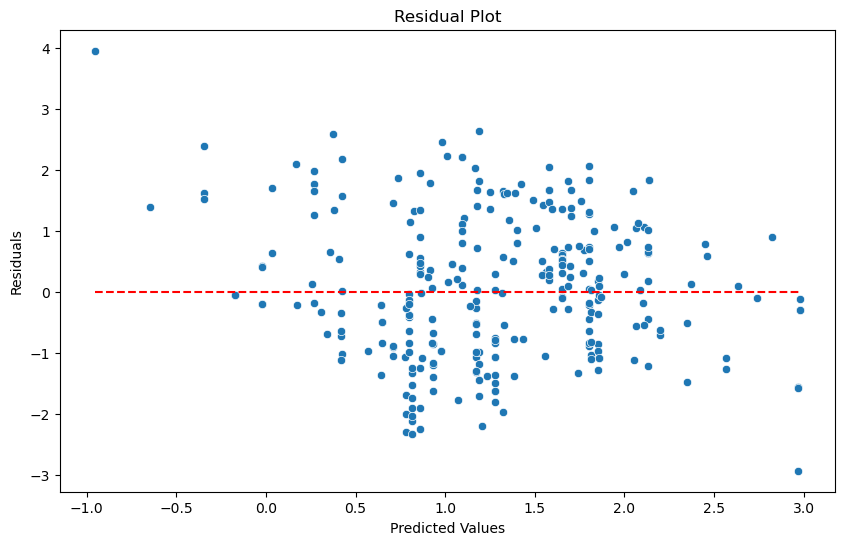

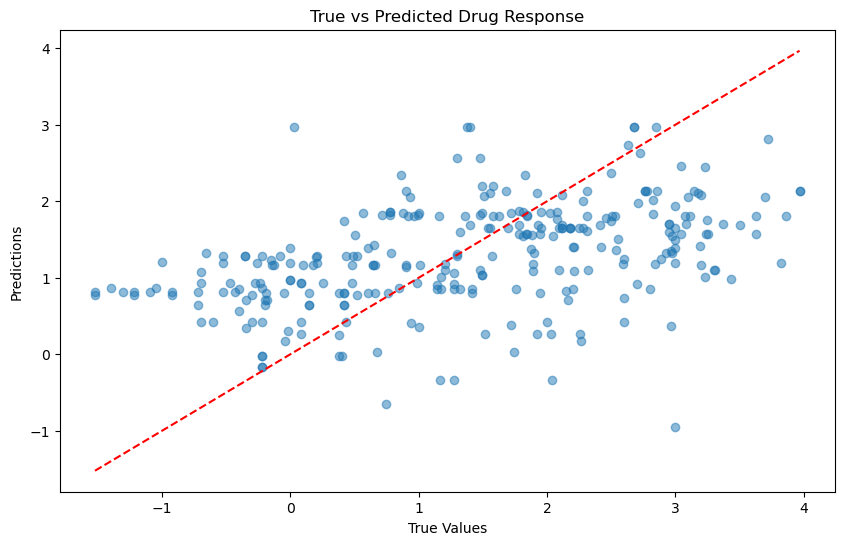

In [15]:
from sklearn.linear_model import Ridge 

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=0.01)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Evaluate the model on the training and test data
print("Training Data Evaluation:")
evaluate_model(y_train, y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(y_test, y_pred_test, tolerance=0.1)

# Visualize the predictions
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

### Hyperparameters tuning

Best alpha: 25.5955
Training Data Evaluation:
Mean Squared Error: 1.3460
R-squared: 0.2580
Accuracy (within tolerance 0.1): 5.73%
Testing Data Evaluation:
Mean Squared Error: 1.3382
R-squared: 0.1950
Accuracy (within tolerance 0.1): 6.60%
Testing Data Visualization:


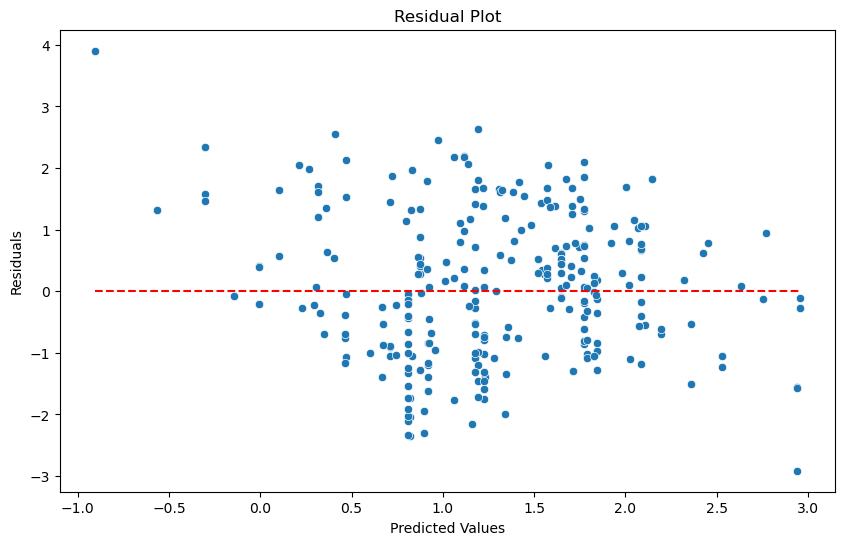

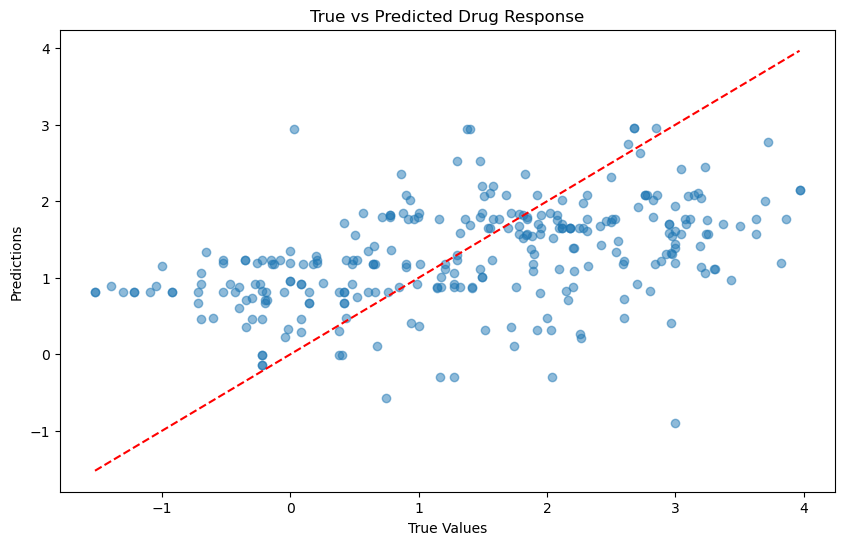

In [69]:
from sklearn.linear_model import RidgeCV

# Define range of alphas to test
alphas = np.logspace(-3, 3, 50)

# Ridge with built-in cross-validation (default: 5-fold)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Best alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha:.4f}")

# Make predictions on the testing data
y_pred_train = ridge_cv.predict(X_train)
y_pred_test = ridge_cv.predict(X_test)

# Evaluate the model on the training and test data
print("Training Data Evaluation:")
evaluate_model(y_train, y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(y_test, y_pred_test, tolerance=0.1)

# Visualize the predictions
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

## Random Forest 

C:\Users\alice\AppData\Local\Temp\ipykernel_107204\1238653355.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Training Data Evaluation:
Mean Squared Error: 0.3912
R-squared: 0.7843
Accuracy (within tolerance 0.2): 31.80%
Testing Data Evaluation:
Mean Squared Error: 0.5651
R-squared: 0.6601
Accuracy (within tolerance 0.2): 29.86%
Training Data Visualization:


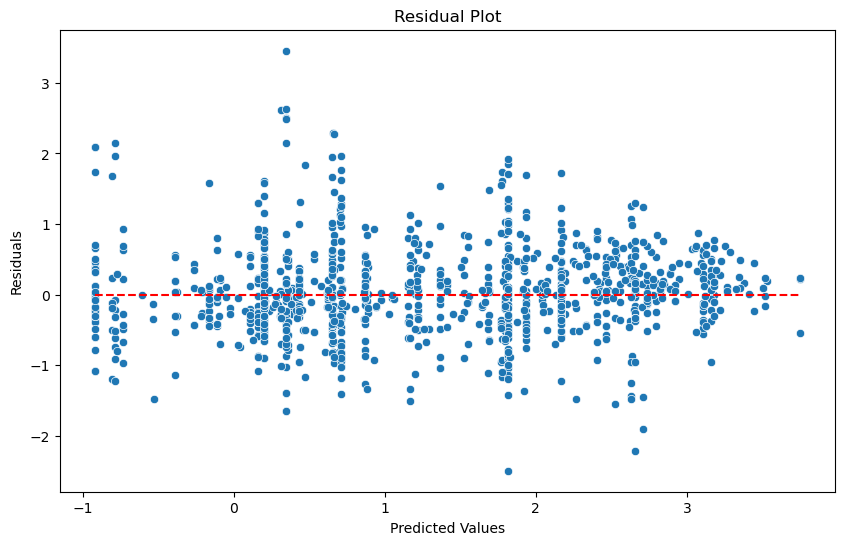

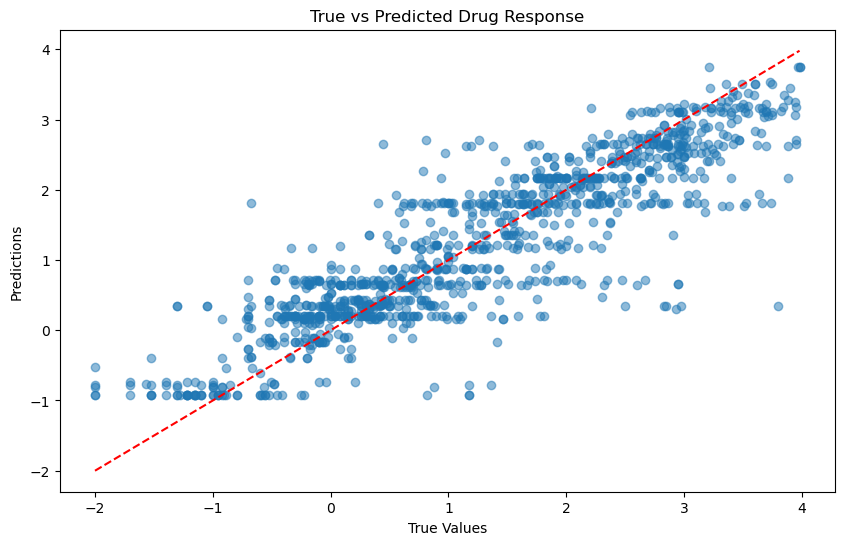

Testing Data Visualization:


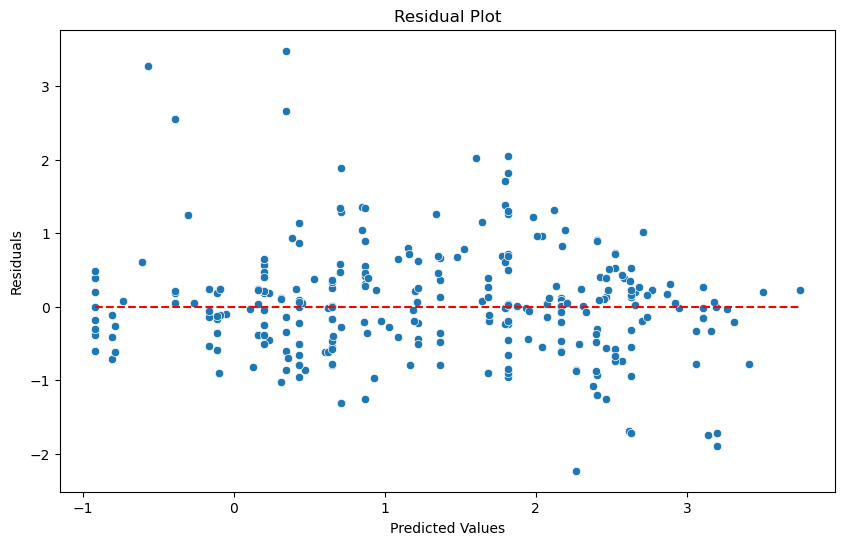

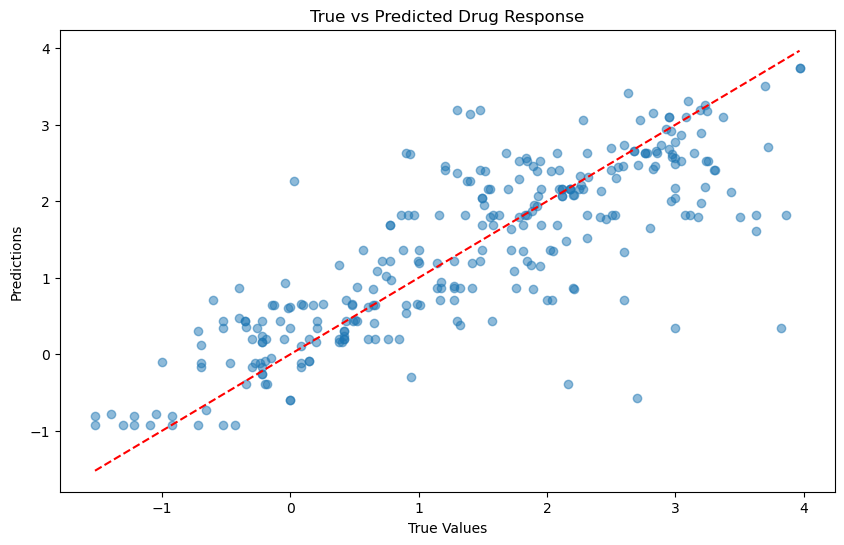

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(np.array(y_train).flatten(), y_pred_train, tolerance=0.2)
print("Testing Data Evaluation:")
evaluate_model(np.array(y_test).flatten(), y_pred_test, tolerance=0.2)

# Visualize the predictions
print("Training Data Visualization:")
visualize_predictions(np.array(y_train).flatten(), np.array(y_pred_train).flatten())
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())

### Hyperparameters tuning

C:\Users\alice\anaconda3\envs\c142\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Training Data Evaluation:
Mean Squared Error: 0.3903
R-squared: 0.7848
Accuracy (within tolerance 0.2): 31.19%
Testing Data Evaluation:
Mean Squared Error: 0.5332
R-squared: 0.6792
Accuracy (within tolerance 0.2): 28.47%
Training Data Visualization:


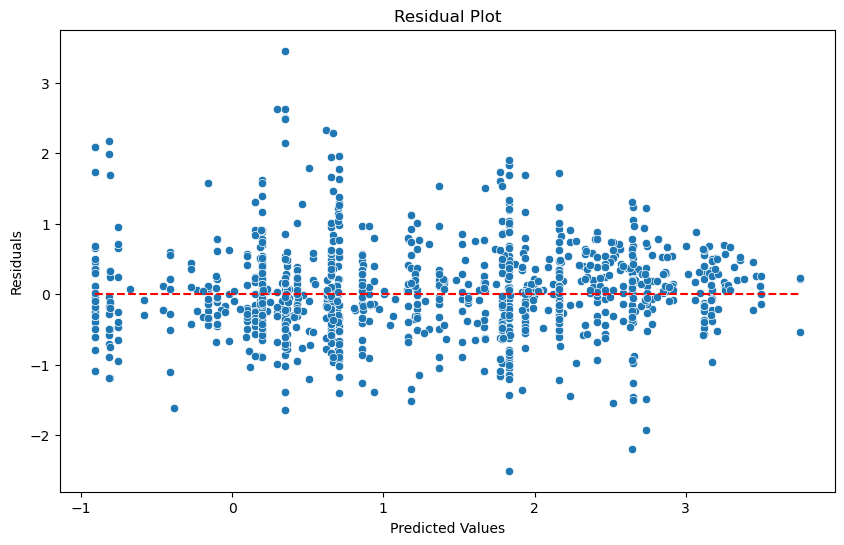

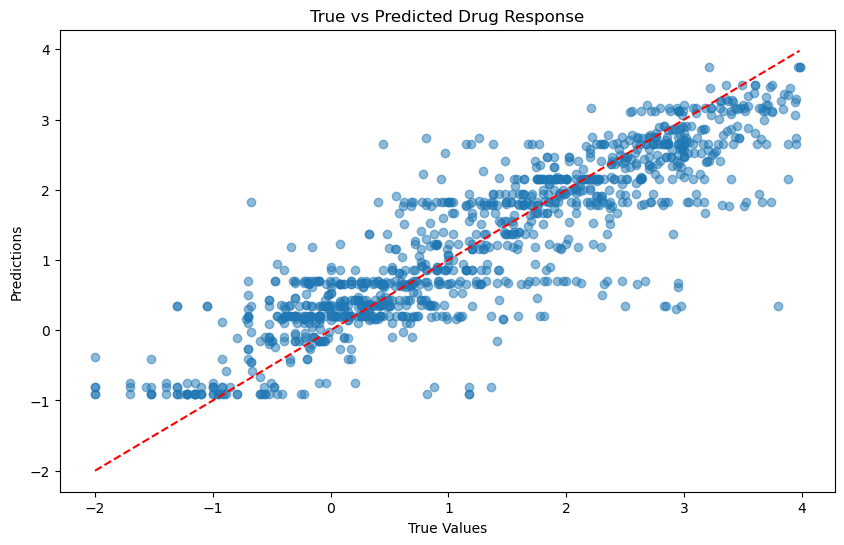

Testing Data Visualization:


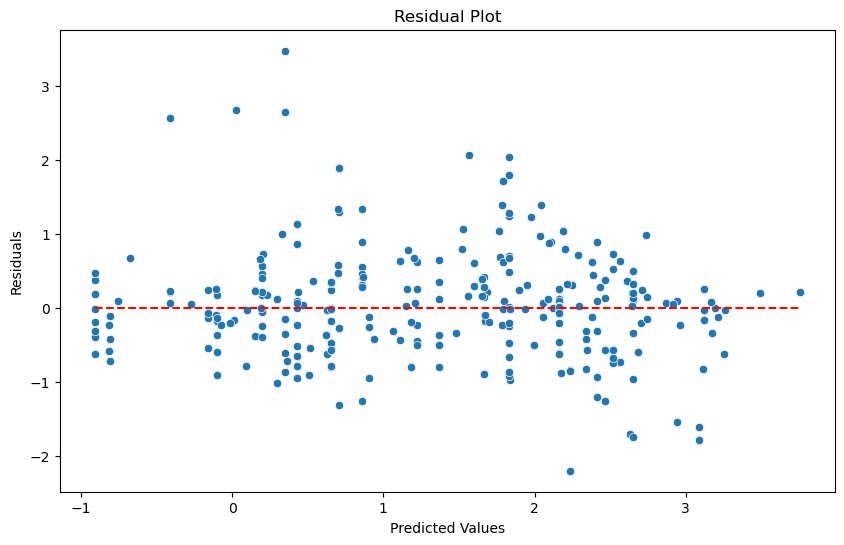

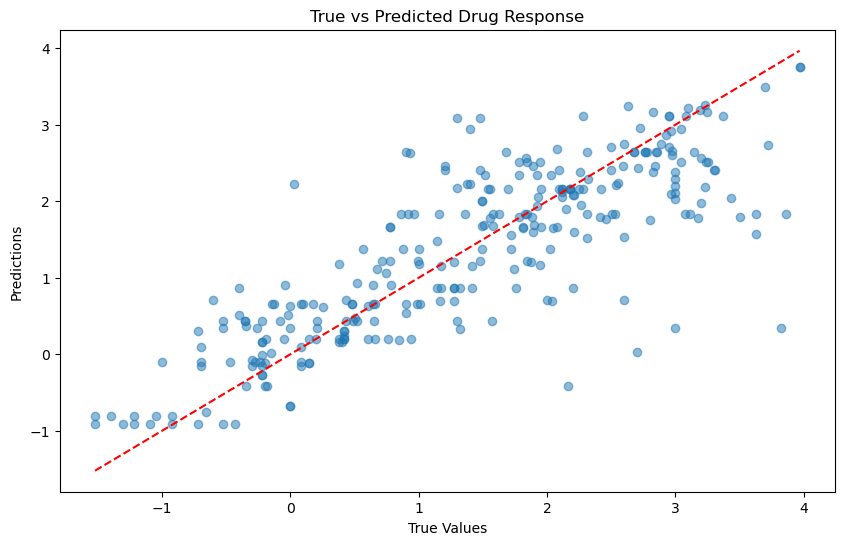

In [72]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(np.array(y_train).flatten(), y_pred_train, tolerance=0.2)
print("Testing Data Evaluation:")
evaluate_model(np.array(y_test).flatten(), y_pred_test, tolerance=0.2)

# Visualize the predictions
print("Training Data Visualization:")
visualize_predictions(np.array(y_train).flatten(), np.array(y_pred_train).flatten())
print("Testing Data Visualization:")
visualize_predictions(np.array(y_test).flatten(), np.array(y_pred_test).flatten())